<a href="https://colab.research.google.com/github/arundhatis90/Data-Analytics-Projects/blob/main/ENews_Express_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.



## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. The objective of this project is to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset

In [ ]:
# complete the code below to load the dataset
df = pd.read_csv('/content/drive/My Drive/Python Course/Project2/abtest.csv')

## Exploratory Data Analysis

### Data Overview

#### Displaying the first few rows of the dataset

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [ ]:
df.describe(exclude=[object])

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [ ]:
df.describe(exclude=[np.number])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


### Check for missing values

In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


### Univariate Analysis

#### Time spent on the page

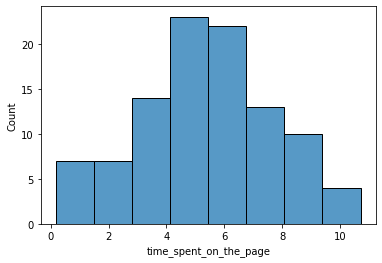

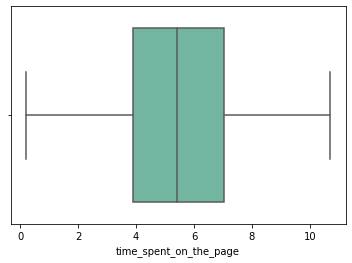

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page',palette='Set2')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page',palette='Set2')
plt.show()

#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

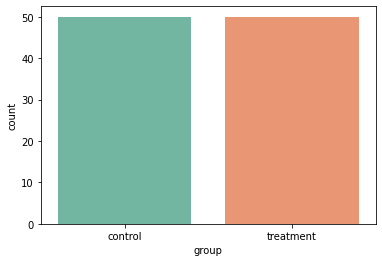

In [ ]:
sns.countplot(data=df,x='group',palette='Set2')
plt.show()

#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

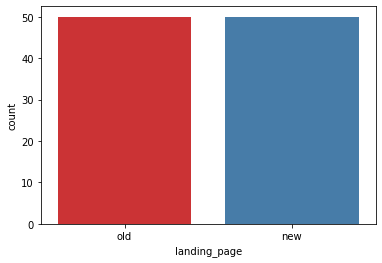

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page',palette='Set1')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

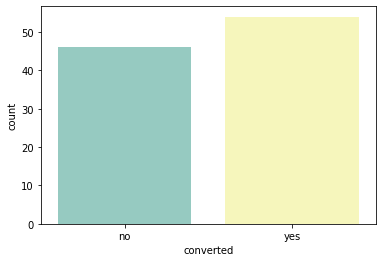

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted',palette='Set3')
plt.show()

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

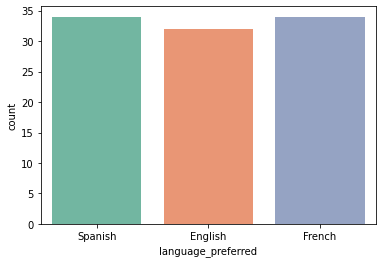

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred', palette='Set2')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

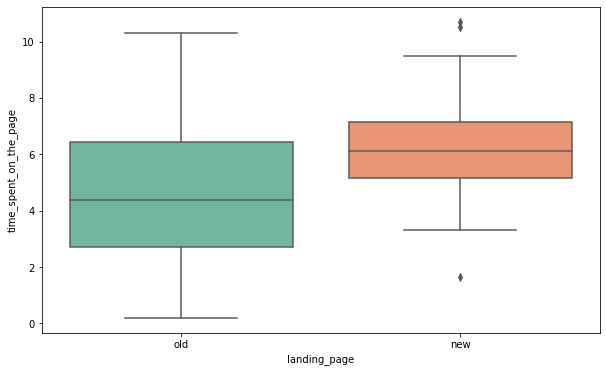

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', palette = 'Set2')
plt.show()

#### Conversion status vs Time spent on the page

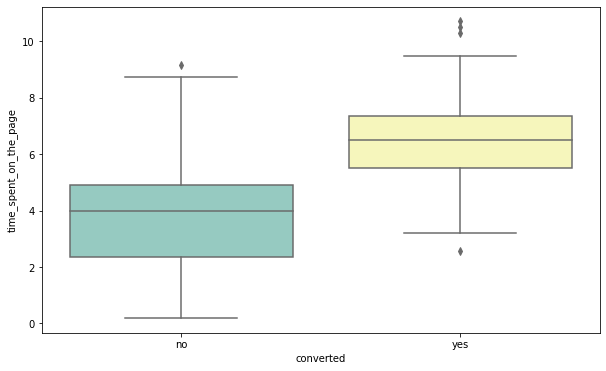

In [ ]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', palette = 'Set3')
plt.show()


#### Language preferred vs Time spent on the page

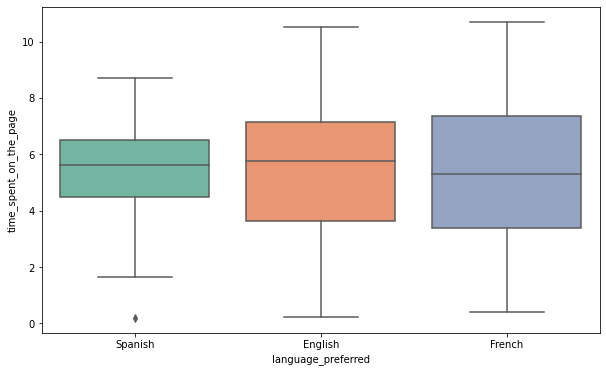

In [ ]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page',palette ='Set2')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

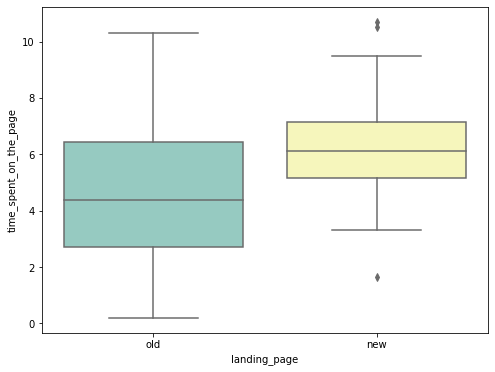

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df, palette = 'Set3')
plt.show()

### Step 1: Defining the null and alternate hypotheses

$H_0$: Mean(time_spent_on_The_page)New <= Mean(time_spent_on_the_page)Old

$H_a$: Mean(time_spent_on_the_page)New > Mean(time_spent_on_the_page)Old



### Step 2: Selecting Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Hence, the 2 sample independent t-test is appropriate to test this.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, the population standard deviations can be assumed to be unequal**.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind


test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = 'False', alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001316123528095005


### Step 6: Comparing the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to conclude that the
users landing on the new landing page spent lesser or the same amount of time as
that of users landing on the old page. Its safe to conclude that the new page
impacted the time users spent on it in a positive way



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual Analysis

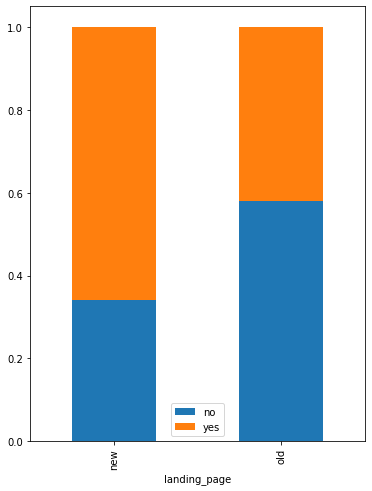

In [ ]:
pd.crosstab(df.landing_page,df.converted,normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Defining the null and alternate hypotheses

$H_0:$ proportion(conversion new)<= proportion(conversion old)

$H_a:$ proportion(conversion new) > proportion(conversion old)



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the 2 proportion z test is appropriate to test this,

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest


test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to conclude that the conversion rate
of users to subscribers landing on the new page is lesser than or same as that of users landing in the old page. Its safe to conclude that the new page impacted the conversion rate in a positive way.



## 3. Does the converted status depend on the preferred language?

### Visual Analysis

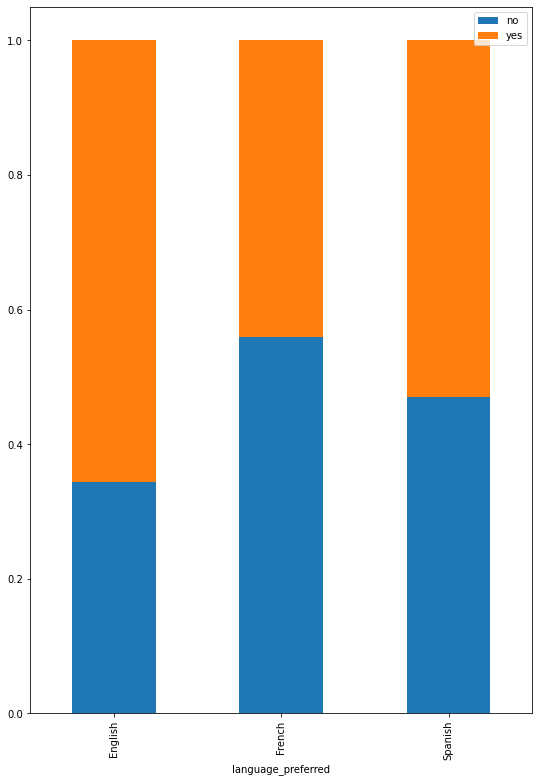

In [ ]:
pd.crosstab(df.language_preferred,df.converted,normalize='index').plot(kind="bar", figsize=(9,13), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0:$ Converted status is independent of preferred language

$H_a:$ Converted status is depends on preferred language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Hence, the chi-square test will be appropriate to test this.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df.language_preferred, df.converted,margins=True,margins_name ='Total')

contingency_table

converted,no,yes,Total
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
Total,46,54,100


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.7970832186581234


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7970832186581234 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to prove that converted status
depends on preferred language.




## 4. Is the time spent on the new page same for the different language users?

### Visual Analysis

In [ ]:
# DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

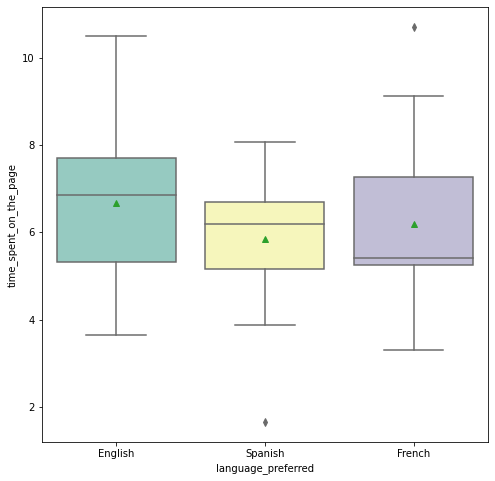

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new, palette='Set3')
plt.show()


In [ ]:
# mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ Mean(TimeSpent-French) = Mean(TimeSpent-Spanish) = Mean(TimeSpent-English)

$H_a:$ Atleast one time spent per page is different from the others



### Step 2: Select Appropriate test

This is a problem, concerning three population means. Thus one way ANOVA F test would be appropriate to test this.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to prove that different language users
spent more or lesser time on the new page on an average




## Conclusion and Business Recommendations


1. Based on the statistical analysis, it is safe to conclude that the new landing page has better user engagement
and is also attracting more subscribers. Recommend management to completely switch over to the new page.
2. Since users are very receptive to the new page, suggest putting out more new content that align with the style
of the new page. Hire content creators and designers to put out content that increase the time spent on the
landing page. Our statistical analysis has clearly shown the longer a user spends on the page, the more likely
they are to convert to subscribers.
3. Different language users show interest in the newsletter. Continue publishing the newsletter in the 3 languages
(Spanish, French & English). Since users from different geographies and cultures are receptive towards the
newsletter, consider increasing the language base to include more languages and geographies, in order to
increase the global reach of the newsletter
4. Vary the content among different user languages to be more culturally and geographically significant so that it
appeals more to users. Include a section about local news, events, food, culture and places so users spend more
time on the page.

___